In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import warp
import cv2
from scipy.ndimage import convolve1d
from matplotlib.patches import ConnectionPatch
from scipy.ndimage import convolve
from skimage.color import rgb2gray


In [8]:
def projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4):
    """
    Computes the projective transformation (in homogeneous coordinates) that
    transforms vectors xi into xai. (The vectors are given in Euclidean
    coordinates).
    """
    M = [[x1[0], x1[1], 1,      0,      0,      0,     -xa1[0]*x1[0],    -xa1[0]*x1[1],     -xa1[0]],
         [     0,       0,     0, x1[0], x1[1], 1,     -xa1[1]*x1[0],    -xa1[1]*x1[1],     -xa1[1]],
         [x2[0], x2[1], 1,      0,      0,      0,     -xa2[0]*x2[0],    -xa2[0]*x2[1],     -xa2[0]],
         [     0,       0,     0, x2[0], x2[1], 1,     -xa2[1]*x2[0],    -xa2[1]*x2[1],     -xa2[1]],
         [x3[0], x3[1], 1,      0,      0,      0,     -xa3[0]*x3[0],    -xa3[0]*x3[1],     -xa3[0]],
         [     0,       0,     0, x3[0], x3[1], 1,     -xa3[1]*x3[0],    -xa3[1]*x3[1],     -xa3[1]],
         [x4[0], x4[1], 1,      0,      0,      0,     -xa4[0]*x4[0],    -xa4[0]*x4[1],     -xa4[0]],
         [     0,       0,     0, x4[0], x4[1], 1,     -xa4[1]*x4[0],    -xa4[1]*x4[1],     -xa4[1]],
         ]
    # get the SVD
    U,S,VH = np.linalg.svd(M)

    # transpose
    VH = VH.T

    # take the final column of the V matrix, which corresponds
    #to the smallest eigenvalue
    VH = VH[:,-1]

    # affine matrix
    A = np.array(((VH[0], VH[1],VH[2]),
         (VH[3], VH[4],VH[5]),
         (VH[6], VH[7],VH[8])))/VH[8]

    return A

def projective_transform_image(F, x1, x2, x3, x4, H, W):
    # YOUR CODE HERE (Replace this and the following line with your code)

    xa1 = [0   ,0   ]
    xa2 = [W-1 ,0   ]
    xa3 = [W-1 ,H-1 ]
    xa4 = [0   ,H-1 ]
    print(affine_transform_matrix(x1, x2, x3, xa1, xa2, xa3))

    a = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[0][0]
    b = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[0][1]
    c = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[0][2]
    d = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[1][0]
    e = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[1][1]
    f = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[1][2]
    g = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[2][0]
    h = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[2][1]
    i = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[2][2]

    matrix = [[a, b, c],
              [d, e, f],
              [g, h, i]]
    ll = matrix

    return warp(F, np.array(np.linalg.inv(matrix)),output_shape = (H,W))

def projective_transform_image_matrix(F, x1, x2, x3, x4, H, W):
    # YOUR CODE HERE (Replace this and the following line with your code)

    xa1 = [0   ,0   ]
    xa2 = [W-1 ,0   ]
    xa3 = [W-1 ,H-1 ]
    xa4 = [0   ,H-1 ]
    print(affine_transform_matrix(x1, x2, x3, xa1, xa2, xa3))

    a = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[0][0]
    b = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[0][1]
    c = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[0][2]
    d = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[1][0]
    e = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[1][1]
    f = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[1][2]
    g = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[2][0]
    h = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[2][1]
    i = projective_transform_matrix(x1, x2, x3, x4, xa1, xa2, xa3, xa4)[2][2]

    matrix = [[a, b, c],
              [d, e, f],
              [g, h, i]]
    ll = matrix

    return ll





def affine_transform_matrix(x1, x2, x3, xa1, xa2, xa3):
    """
    Calculates the affine transformation matrix A that maps
    (in homogeneous coordinates) the vectors xi to xai. The
    vectors are given in Euclidean coordinates.
    """
    # YOUR CODE HERE (Replace this and the following line with your code)
    q = np.array([xa1[0],
         xa1[1],
         xa2[0],
         xa2[1],
         xa3[0],
         xa3[1]])
    # print(q)
    M = np.array([[x1[0], x1[1], 1,      0,      0,      0],
         [     0,       0,     0, x1[0], x1[1], 1],
         [x2[0], x2[1], 1,      0,      0,      0],
         [     0,       0,     0, x2[0], x2[1], 1],
         [x3[0], x3[1], 1,      0,      0,      0],
         [     0,       0,     0, x3[0], x3[1], 1]])

    M = np.linalg.inv(M)

    p = np.dot(M, q)

    #return p

    A = np.vstack([[p[0], p[1], p[2]],
                  [p[3], p[4], p[5]],
                  [0, 0, 1]])

    return A
def e2h(x):
    if len(x.shape) == 1:
        return np.hstack((x, [1]))
    return np.vstack((x, np.ones(x.shape[1])))

def h2e(tx):
    return tx[:-1]/tx[-1]


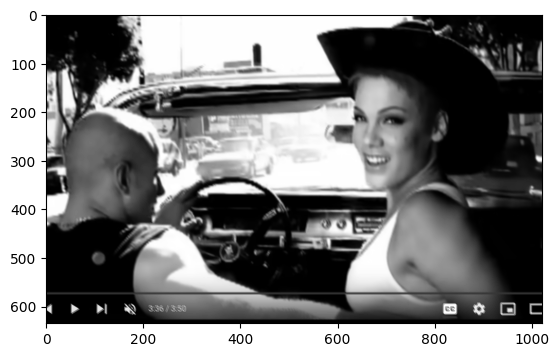

In [9]:
f = plt.imread('jjgfff.png')[:,:,:-1]

f=rgb2gray(f)
plt.imshow
plt.imshow(convolve(f,[
    [0.2,0,0],
    [0,0,0],
    [0,0,0.2]]),cmap='gray')

In [10]:
np.array([1, 0])+np.array([1, 0])

array([2, 0])

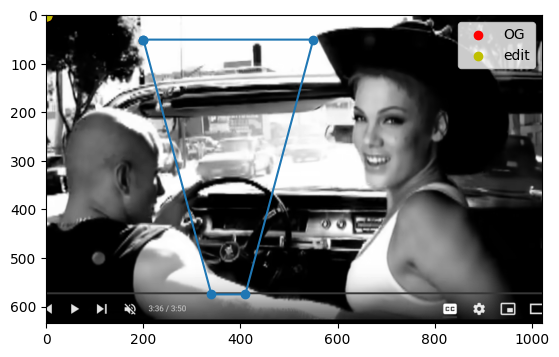

In [11]:
x = [1,1,0,0]
y = [1,0,1,0]

xa=[1,0.8,0,0.2]
ya=[0,1.5,0,1.5]

o=350
x_displace = 200
y_displace = 50
x2 = np.array([1, 0])*o+np.array([x_displace, y_displace])
x3 = np.array([0.6, 1.5])*o+np.array([x_displace, y_displace])
x1 = np.array([0, 0])*o+np.array([x_displace, y_displace])
x4 = np.array([0.4, 1.5])*o+np.array([x_displace, y_displace])

# x1 = np.array([0.6, 0])*o
# x4 = np.array([1, 1.5])*o
# x2 = np.array([0.4, 0])*o
# x3 = np.array([0, 1.5])*o



def quadrilateral(x1, x2, x3, x4):
    return np.column_stack((x1, x2, x3, x4))
def draw_polygon(p, ax, closed=True, filled=False):
    if closed:
        pp = np.column_stack((p,p[:,0]))
    ax.plot(pp[0], pp[1], '-o')

draw_polygon(quadrilateral(x1, x2, x3, x4), ax=plt.gca())

f = plt.imread('jjgfff.png')[:,:,:-1]

f=rgb2gray(f)
plt.imshow(f,cmap='gray')

plt.scatter(x,y,color="r",label="OG")
plt.scatter(xa,ya,color="y",label="edit")
# P = np.array([[-5,1,6],
#      [0,-5,-6],
#      [0,0,-5]])
# data = list(zip(x,y))
# for x,y in data:
#   L = e2h(np.array([x,y]))
#   [xa, ya]= h2e(P @ L)
#   plt.scatter(x,y,color="r",label="OG")
#   plt.scatter(xa,ya,color="y",label="edit")
plt.legend()



[[ 1.71142857e+00  4.56380952e-01 -3.65104762e+02]
 [-2.01606408e-17  1.52190476e+00 -7.60952381e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


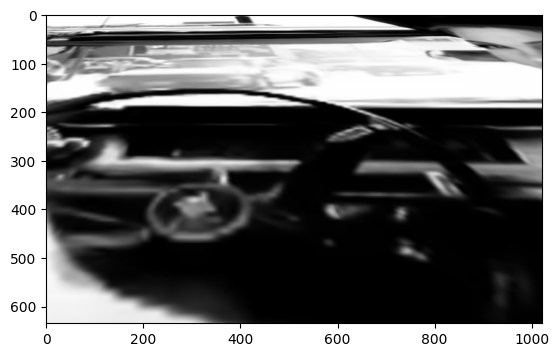

In [12]:
a = np.array(projective_transform_image_matrix(f, x1, x2, x3, x4, 800, 600))
G=warp(f,np.linalg.inv(a)) 

plt.imshow(G,cmap='gray')

[[ 1.71142857e+00  4.56380952e-01 -3.65104762e+02]
 [-2.01606408e-17  1.52190476e+00 -7.60952381e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
<class 'numpy.ndarray'>


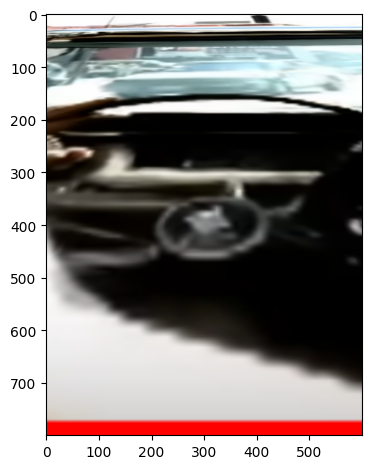

In [13]:
from PIL import Image, ImageDraw
from io import BytesIO
f = plt.imread('jjgfff.png')
G = projective_transform_image(f, x1, x2, x3, x4, 800, 600)
plt.imshow(G)
print(type(G))
plt.tight_layout()


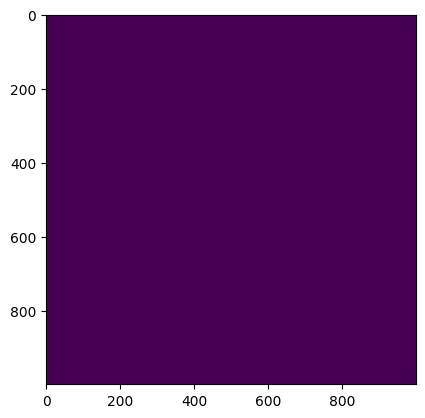

In [14]:
U=np.zeros((1000,1000))
warp
plt.imshow(U)

[[ 1.71142857e+00  4.56380952e-01 -3.65104762e+02]
 [-2.01606408e-17  1.52190476e+00 -7.60952381e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


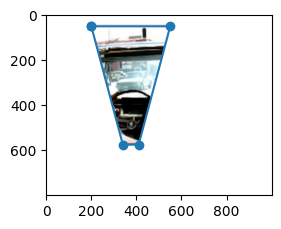

In [15]:

plt.subplot(121)
draw_polygon(quadrilateral(x1, x2, x3, x4), ax=plt.gca())


ll = projective_transform_image_matrix(G, x1, x2, x3, x4, 800, 600)

K = warp(G,np.array(ll),output_shape = (800,1000))
plt.imshow(K);

[[ 1.71142857e+00  0.00000000e+00 -6.84571429e+02]
 [-2.36551519e-16  2.28285714e+00 -1.48385714e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


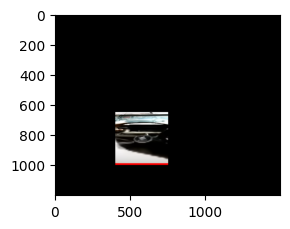

In [16]:
o=350
x_displace = 400
y_displace = 650
x2 = np.array([1, 0])*o+np.array([x_displace, y_displace])
x3 = np.array([1, 1])*o+np.array([x_displace, y_displace])
x1 = np.array([0, 0])*o+np.array([x_displace, y_displace])
x4 = np.array([0, 1])*o+np.array([x_displace, y_displace])
plt.subplot(121)
# draw_polygon(quadrilateral(x1, x2, x3, x4), ax=plt.gca())


ll = projective_transform_image_matrix(G, x1, x2, x3, x4, 800, 600)

K = warp(G,np.array(ll),output_shape = (1200,1500))[:,:,:-1]
plt.imshow(K);


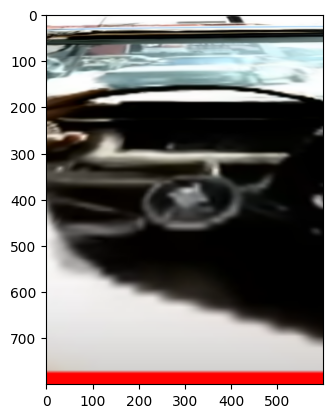

In [17]:
GG = np.array(G[:,:,:-1]*255).astype(np.uint8)
plt.imshow(GG);

In [18]:
f = plt.imread('jjgfff.png')[:,:,:-1]

fd = cv2.SIFT_create()
kp1, d1 = fd.detectAndCompute(GG[:,:,::-1], None)
kp2, d2 = fd.detectAndCompute(f[:,:,::-1], None)
plt.figure(figsize=(15,15))
plt.imshow(f1)
draw_keypoints(kp1)
plt.axis('off')
plt.tight_layout()
plt.figure(figsize=(15,15))
plt.imshow(f2)
draw_keypoints(kp2)
plt.axis('off')
plt.tight_layout()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'cv::SIFT_Impl::detectAndCompute'
